In [25]:
from utils import *
def read_measurements_df_6axis(port='/dev/ttyUSB0', duration=10, calibration=False):
    '''

    :param port:
    :param duration:
    :param calibration:
    :return:
    '''
    # Setting up the Modbus RTU connection
    instrument = minimalmodbus.Instrument(port, 1)
    instrument.serial.baudrate = 115200
    instrument.serial.parity = minimalmodbus.serial.PARITY_NONE
    instrument.mode = minimalmodbus.MODE_RTU

    # Store measurements for each of the 6 sensors
    measurements = [[] for _ in range(6)]
    time_points = []

    end_time = time.time() + duration  # Measure for 5 seconds

    while time.time() < end_time:
        # Reading 12 registers starting from 2560 (0x0A00 in hex), which equals 24 bytes
        response = instrument.read_registers(2560, 12, functioncode=3)

        # Extracting the 6 quantities from the response and convert using two's complement
        quantities = [twos_complement((response[i] << 16) | response[i + 1], 32) for i in range(0, len(response), 2)]

        # Append measurements for each sensor
        for q_values, q in zip(measurements, quantities):
            q_values.append(q)

        time_points.append(time.time() - (end_time - duration))  # Record the measurement time

        time.sleep(0.003)  # Interval of 0.1 seconds

    # Convert data to a DataFrame for easy plotting with Plotly Express
    labels = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']
    df = pd.DataFrame({'Time': time_points})
    for label, data in zip(labels, measurements):
        df[label] = data
    df['Mx'] = -df['Mx']
    df['Mz'] = -df['Mz']
    if calibration:
        return df-calib
    else:
        return df


In [32]:
port = "/dev/ttyUSB0"
df1 = read_measurements_df_6axis(port=port, duration=5)

In [33]:
df1

,Time,Fx,Fy,Fz,Mx,My,Mz
0,0.014199,258,196,-962,-1108,-270,886
1,0.031279,258,195,-962,-1108,-270,884
2,0.048188,258,195,-962,-1108,-270,884
3,0.065415,258,195,-962,-1108,-268,884
4,0.082289,258,195,-962,-1113,-270,884
...,...,...,...,...,...,...,...
278,4.926610,258,196,-961,-1124,-259,884
279,4.944081,258,196,-961,-1124,-259,884
280,4.961724,258,196,-961,-1124,-259,884
281,4.979673,258,196,-961,-1124,-259,884


<Axes: xlabel='Time'>

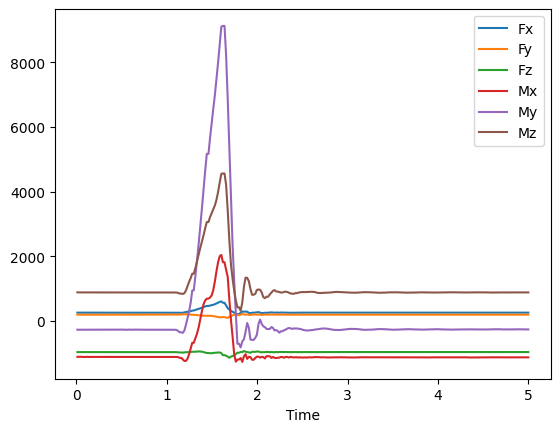

In [34]:
df1.plot(x='Time')